<a href="https://colab.research.google.com/github/NewKanvas/Projeto-5/blob/main/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Questionamentos:**

1. Como se comportaram os valores para todas as criptomoedas?   
   Os valores tiveram uma tendência de queda ou de aumento?

2. Quais os valores médios para todas as criptomoedas?

3. Em quais anos houve maiores quedas e valorizações?

4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?

5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica?

6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série histórica?

7. Existe correlação entre os valores para todas as criptomoedas?


# Importando as bibliotecas

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px #  pip install --upgrade plotly

# **Carregando e Tratando Dados**

In [104]:
# Lendo os datasets
aave = pd.read_csv('https://raw.githubusercontent.com/NewKanvas/Projeto-5/main/Data/coin_Aave.csv')
binance_coin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_BinanceCoin.csv')
bitcoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Bitcoin.csv')
cardano = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Cardano.csv')
chainlink = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_ChainLink.csv')
cosmos = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Cosmos.csv')
crypto_com_coin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_CryptocomCoin.csv')
dogecoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Dogecoin.csv')
eos = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_EOS.csv')
ethereum = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Ethereum.csv')
iota = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Iota.csv')
litecoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Litecoin.csv')
monero = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Monero.csv')
nem = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_NEM.csv')
polkadot = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Polkadot.csv')
solana = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Solana.csv')
stellar = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Stellar.csv')
tether = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Tether.csv')
tron = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Tron.csv')
uniswap = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Uniswap.csv')
usdcoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_USDCoin.csv')
wrapped_bitcoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_WrappedBitcoin.csv')
xrp = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_XRP.csv')


In [105]:
# Concatenando Datasets
cripto = pd.concat([aave, binance_coin, bitcoin, cardano, chainlink, cosmos, crypto_com_coin, dogecoin, eos, ethereum, iota, litecoin, monero, nem, polkadot, solana, stellar, tether, tron, uniswap, usdcoin, wrapped_bitcoin, xrp], ignore_index=True)
cripto['Date'] = pd.to_datetime(cripto['Date']).dt.date #Convertendo para conter somente a Data
del cripto['SNo'] # Removendo a coluna Sno

# **Lembrete** verificar se vai usar a coluna Symbol

In [106]:
cripto.dtypes

Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

### Testando

In [107]:
cripto # Definir oque é o valor real, seria a media do valor mais alto e baixo? o valor no qual ela terminou?

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,Aave,AAVE,2020-10-05,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,Aave,AAVE,2020-10-06,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,Aave,AAVE,2020-10-07,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,Aave,AAVE,2020-10-08,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,Aave,AAVE,2020-10-09,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...
37077,XRP,XRP,2021-07-02,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10
37078,XRP,XRP,2021-07-03,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10
37079,XRP,XRP,2021-07-04,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10
37080,XRP,XRP,2021-07-05,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10


In [108]:
criptoTest1 = cripto.groupby(['Name','Date'])[['High','Low']].first()
criptoTest1['Mean'] = (criptoTest1['High'] + criptoTest1['Low']) / 2
del criptoTest1['High']
del criptoTest1['Low']
criptoTest1

Mean
Name Date                 
Aave 2020-10-05  52.450129
     2020-10-06  47.068424
     2020-10-07  39.189502
     2020-10-08  40.799284
     2020-10-09  45.430654
...                    ...
XRP  2021-07-02   0.651006
     2021-07-03   0.664165
     2021-07-04   0.686793
     2021-07-05   0.672073
     2021-07-06   0.666300

[37082 rows x 1 columns]

In [109]:
criptoTest1 = criptoTest1.unstack()
criptoTest1

Mean                                                 \
Date             2013-04-29  2013-04-30  2013-05-01  2013-05-02 2013-05-03   
Name                                                                         
Aave                    NaN         NaN         NaN         NaN        NaN   
Binance Coin            NaN         NaN         NaN         NaN        NaN   
Bitcoin          140.744003  140.489998  123.805000  108.940948  93.613998   
Cardano                 NaN         NaN         NaN         NaN        NaN   
Chainlink               NaN         NaN         NaN         NaN        NaN   
Cosmos                  NaN         NaN         NaN         NaN        NaN   
Crypto.com Coin         NaN         NaN         NaN         NaN        NaN   
Dogecoin                NaN         NaN         NaN         NaN        NaN   
EOS                     NaN         NaN         NaN         NaN        NaN   
Ethereum                NaN         NaN         NaN         NaN        NaN   
IOTA                    NaN         NaN         NaN         NaN        NaN   
Litecoin           4.399620    4.370670    3.938575    3.523235   2.924775   
Monero                  NaN         NaN         NaN         NaN        NaN   
NEM                     NaN         NaN         NaN         NaN        NaN   
Polkadot                NaN         NaN         NaN         NaN        NaN   
Solana                  NaN         NaN         NaN         NaN        NaN   
Stellar                 NaN         NaN         NaN         NaN        NaN   
TRON                    NaN         NaN         NaN         NaN        NaN   
Tether                  NaN         NaN         NaN         NaN        NaN   
USD Coin                NaN         NaN         NaN         NaN        NaN   
Uniswap                 NaN         NaN         NaN         NaN        NaN   
Wrapped Bitcoin         NaN         NaN         NaN         NaN        NaN   
XRP                     NaN         NaN         NaN         NaN        NaN   

                                                                            \
Date             2013-05-04 2013-05-05  2013-05-06  2013-05-07  2013-05-08   
Name                                                                         
Aave                    NaN        NaN         NaN         NaN         NaN   
Binance Coin            NaN        NaN         NaN         NaN         NaN   
Bitcoin          103.750000  112.97150  115.651501  105.571999  112.689999   
Cardano                 NaN        NaN         NaN         NaN         NaN   
Chainlink               NaN        NaN         NaN         NaN         NaN   
Cosmos                  NaN        NaN         NaN         NaN         NaN   
Crypto.com Coin         NaN        NaN         NaN         NaN         NaN   
Dogecoin                NaN        NaN         NaN         NaN         NaN   
EOS                     NaN        NaN         NaN         NaN         NaN   
Ethereum                NaN        NaN         NaN         NaN         NaN   
IOTA                    NaN        NaN         NaN         NaN         NaN   
Litecoin           3.266765    3.51926    3.448520    3.173255    3.387370   
Monero                  NaN        NaN         NaN         NaN         NaN   
NEM                     NaN        NaN         NaN         NaN         NaN   
Polkadot                NaN        NaN         NaN         NaN         NaN   
Solana                  NaN        NaN         NaN         NaN         NaN   
Stellar                 NaN        NaN         NaN         NaN         NaN   
TRON                    NaN        NaN         NaN         NaN         NaN   
Tether                  NaN        NaN         NaN         NaN         NaN   
USD Coin                NaN        NaN         NaN         NaN         NaN   
Uniswap                 NaN        NaN         NaN         NaN         NaN   
Wrapped Bitcoin         NaN        NaN         NaN         NaN         NaN   
XRP                     NaN        NaN      

Text(0.5, 1.0, 'Valor Médio Diário das Criptomoedas')

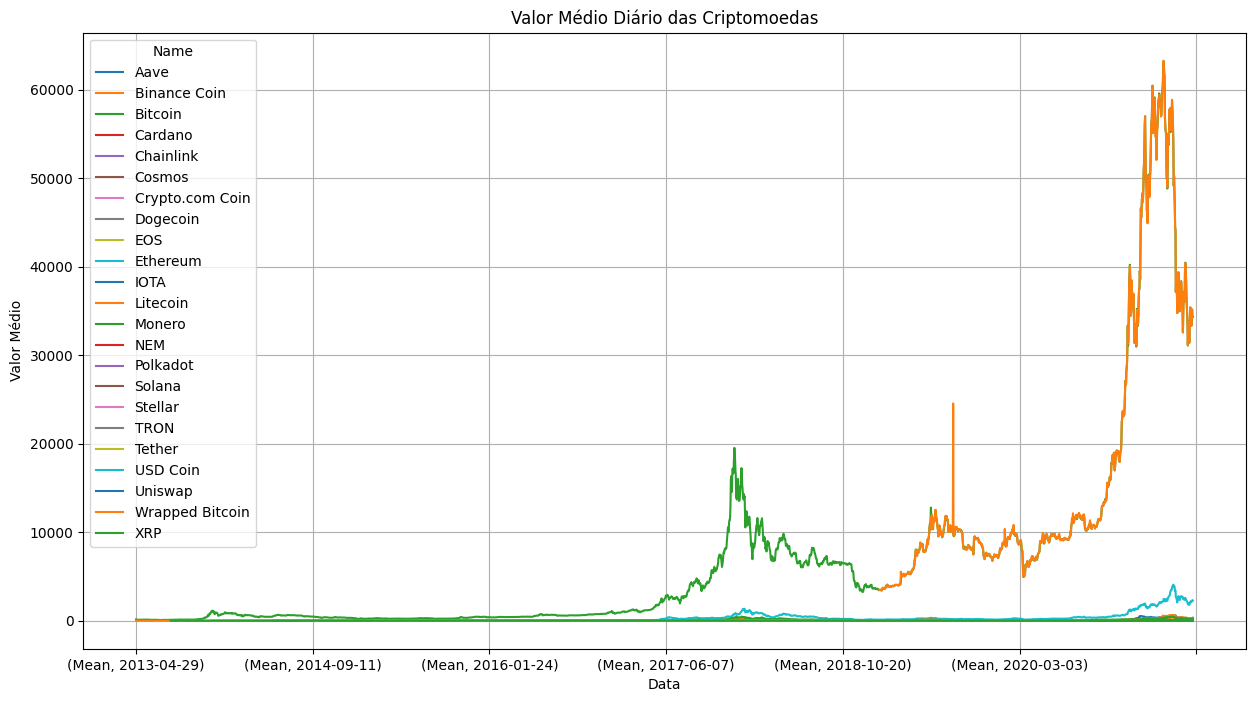

In [141]:
criptoTest1.T.plot(grid = True, figsize=(15,8)) # Melhorar o grafico para ficar mais visivel as outras moedas
# comentar os pontos mais altos, picos

plt.xlabel('Data')
plt.ylabel('Valor Médio')
plt.title('Valor Médio Diário das Criptomoedas')

In [118]:
criptoTest = cripto.groupby(['Name','Date'])[['High','Low']].first()
criptoTest['Mean'] = (criptoTest['High'] + criptoTest['Low']) / 2
criptoTest.reset_index(inplace=True)
groups = criptoTest.groupby('Name')

Text(0.5, 1.0, 'Valor Médio Diário das Criptomoedas')

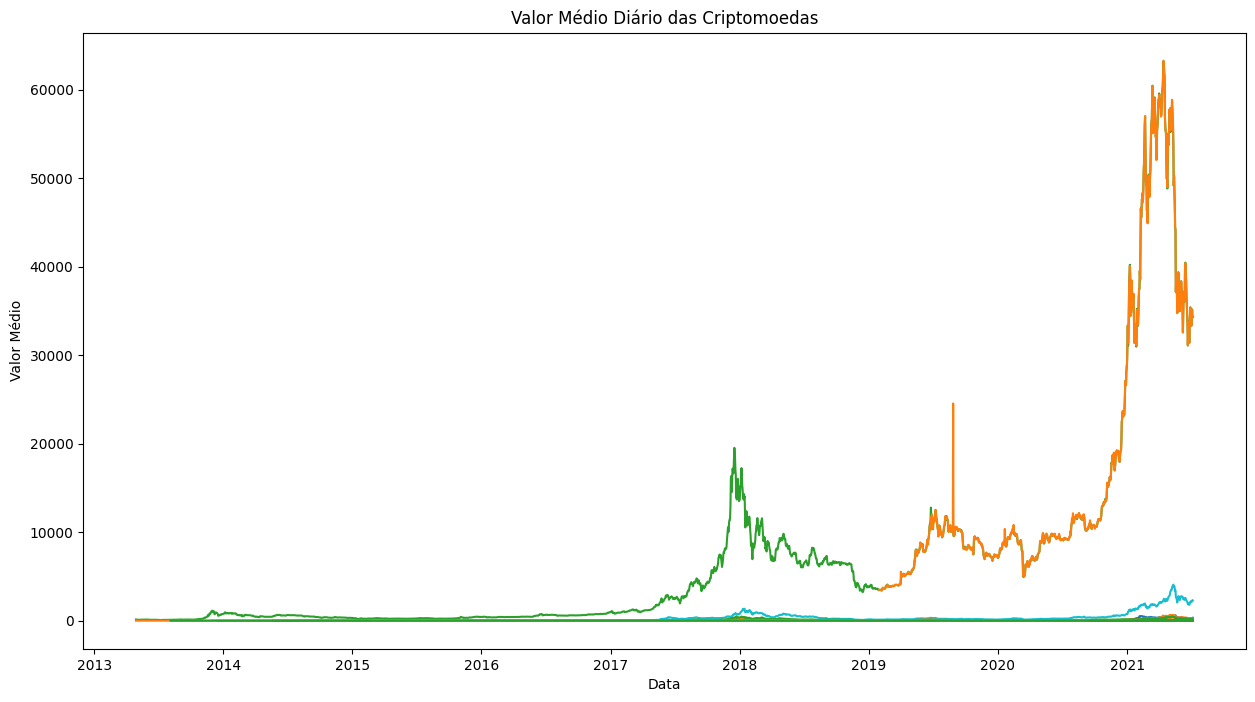

In [119]:
fig, ax = plt.subplots(figsize=(15, 8))
for name, group in groups:
    ax.plot(group['Date'], group['Mean'], label=name)


ax.set_xlabel('Data')
ax.set_ylabel('Valor Médio')
ax.set_title('Valor Médio Diário das Criptomoedas')

In [148]:
criptoTest = cripto.groupby(['Name','Date'])[['High','Low']].first()
criptoTest['Mean'] = (criptoTest['High'] + criptoTest['Low']) / 2
criptoTest.reset_index(inplace=True)
del criptoTest['High']
del criptoTest['Low']
criptoTest = criptoTest.set_index(['Name', 'Date']).unstack(level=0)
criptoTest

Mean                                                  \
Name              Aave Binance Coin       Bitcoin   Cardano  Chainlink   
Date                                                                     
2013-04-29         NaN          NaN    140.744003       NaN        NaN   
2013-04-30         NaN          NaN    140.489998       NaN        NaN   
2013-05-01         NaN          NaN    123.805000       NaN        NaN   
2013-05-02         NaN          NaN    108.940948       NaN        NaN   
2013-05-03         NaN          NaN     93.613998       NaN        NaN   
...                ...          ...           ...       ...        ...   
2021-07-02  225.217748   283.985992  33355.134740  1.340502  17.912879   
2021-07-03  246.796274   293.019939  34155.978217  1.400689  18.392039   
2021-07-04  268.643307   303.750195  35167.022302  1.437935  18.961730   
2021-07-05  290.410557   300.604160  34249.002732  1.420253  18.530821   
2021-07-06  327.356153   311.858275  34319.226266  1.425084  19.296437   

                                                                        ...  \
Name           Cosmos Crypto.com Coin  Dogecoin       EOS     Ethereum  ...   
Date                                                                    ...   
2013-04-29        NaN             NaN       NaN       NaN          NaN  ...   
2013-04-30        NaN             NaN       NaN       NaN          NaN  ...   
2013-05-01        NaN             NaN       NaN       NaN          NaN  ...   
2013-05-02        NaN             NaN       NaN       NaN          NaN  ...   
2013-05-03        NaN             NaN       NaN       NaN          NaN  ...   
...               ...             ...       ...       ...          ...  ...   
2021-07-02  11.154430        0.111585  0.243423  3.876247  2088.710652  ...   
2021-07-03  11.869287        0.116183  0.246334  3.960211  2177.578584  ...   
2021-07-04  11.977329        0.121214  0.247996  4.067196  2287.562280  ...   
2021-07-05  12.962012        0.117975  0.237129  3.917509  2242.482115  ...   
2021-07-06  13.422202        0.120357  0.235876  3.900948  2272.107130  ...   

                                                                          \
Name             NEM   Polkadot     Solana   Stellar      TRON    Tether   
Date                                                                       
2013-04-29       NaN        NaN        NaN       NaN       NaN       NaN   
2013-04-30       NaN        NaN        NaN       NaN       NaN       NaN   
2013-05-01       NaN        NaN        NaN       NaN       NaN       NaN   
2013-05-02       NaN        NaN        NaN       NaN       NaN       NaN   
2013-05-03       NaN        NaN        NaN       NaN       NaN       NaN   
...              ...        ...        ...       ...       ...       ...   
2021-07-02  0.127430  15.072151  32.755855  0.263116  0.064981  1.000410   
2021-07-03  0.132355  15.422621  34.351623  0.265020  0.066309  1.000294   
2021-07-04  0.134986  15.900629  34.529054  0.265716  0.066648  0.999534   
2021-07-05  0.132274  15.392640  33.472258  0.260286  0.065517  1.000233   
2021-07-06  0.132561  15.686577  33.954313  0.260652  0.065189  1.000352   

                                                           
Name        USD Coin    Uniswap Wrapped Bitcoin       XRP  
Date                                                       
2013-04-29       NaN        NaN             NaN       NaN  
2013-04-30       NaN        NaN             NaN       NaN  
2013-05-01       NaN        NaN             NaN       NaN  
2013-05-02       NaN        NaN             NaN       NaN  
2013-05-03       NaN        NaN             NaN       NaN  
...              ...        ...             ...       ...  
2021-07-02  1.000441  17.613694    33301.417865  0.651006  
2021-07-03  1.000298  18.687372    34126.187823  0.664165  
2021-07-04  0.999544  20.214391    35148.437010  0.686793  
2021-07-05  1.000149  20.024346    34291.395189  0.672073  
2021-07-06  1.000197  21.6320

In [147]:
criptoTest.plot(grid = True, figsize=(15,8)) # Melhorar o grafico para ficar mais visivel as outras moedas
# comentar os pontos mais altos, picos

plt.xlabel('Data')
plt.ylabel('Valor Médio')
plt.title('Valor Médio Diário das Criptomoedas')

TypeError: no numeric data to plot